Model 1 Coefficients: [1.76984872 0.63167976 1.5789844 ]
Model 1 Intercept: 3.9676126812868944
İlk Regresyon Modeli (Train):
R²: 0.9521, MSE: 12.0501, RMSE: 3.4713, MAE: 3.1477
İlk Regresyon Modeli (Test):
R²: 0.8526, MSE: 15.5553, RMSE: 3.9440, MAE: 3.8055

Model 2 Coefficients: [0.7804694  2.51686665]
Model 2 Intercept: -1.4835106784394014

İkinci Regresyon Modeli (Train):
R²: 0.9441, MSE: 14.0658, RMSE: 3.7504, MAE: 3.4690
İkinci Regresyon Modeli (Test):
R²: 0.8056, MSE: 20.5185, RMSE: 4.5297, MAE: 3.2617


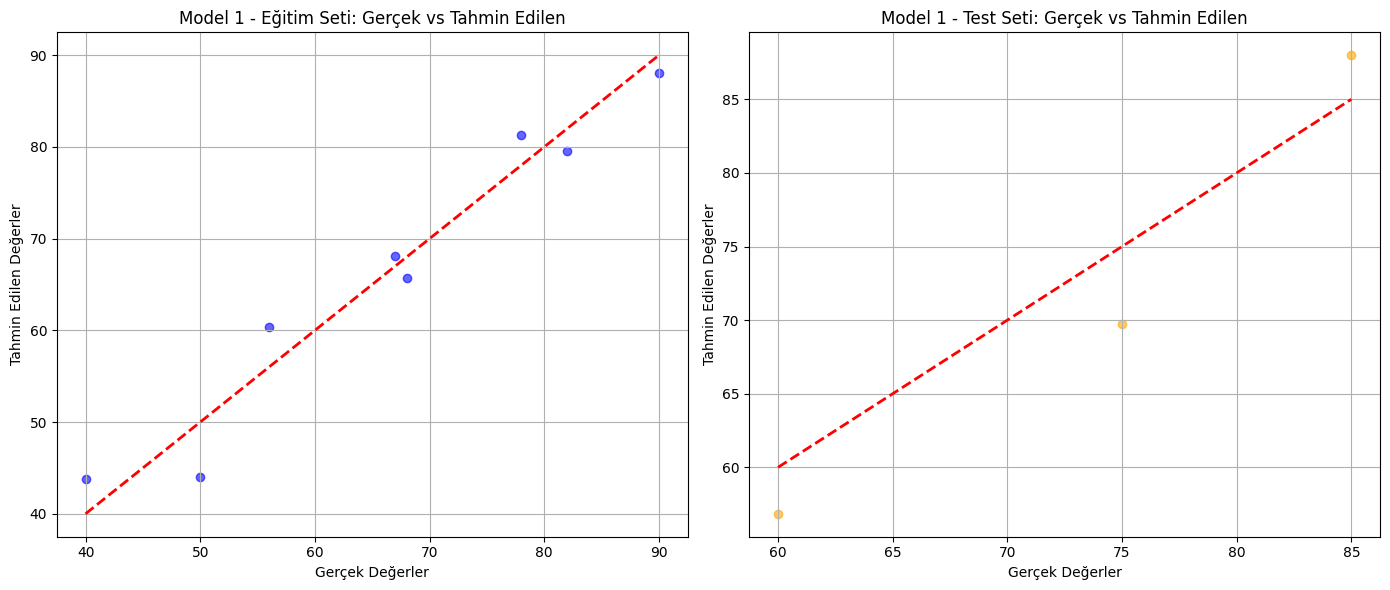

<Figure size 1000x500 with 0 Axes>

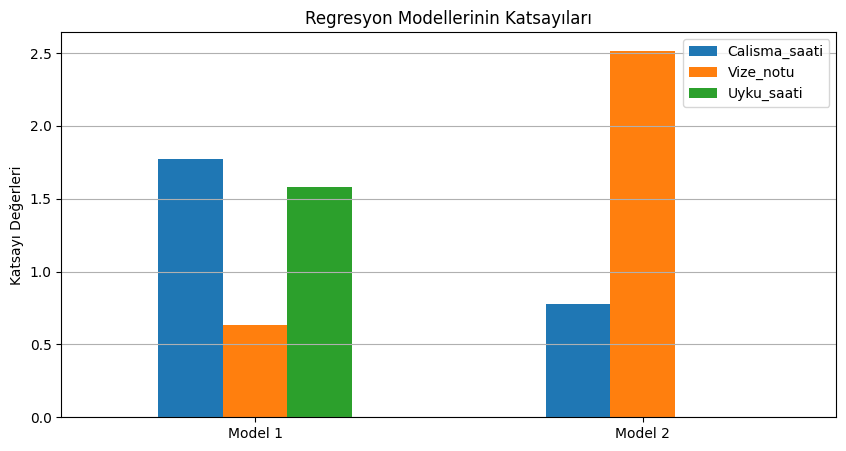

In [2]:
# Gerekli kütüphaneleri yükleyin
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Performans metrikleri hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae

# 2. CSV dosyasından veri okuma
df_data = pd.read_csv('veri_seti.csv')  # Dosya ismini doğru belirtin

# 3. İlk Regresyon Modeli (Çalışma Saati, Vize Notu, Uyku Saati ile Final)
X_feat1 = df_data[['Calisma_saati', 'Vize_notu', 'Uyku_saati']]  # Özellikler
y1 = df_data['Final']  # Hedef

# Eğitim ve test setlerine ayırma
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_feat1, y1, test_size=0.2, random_state=42)

# sklearn ile model eğitimi
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Tahminler
y_train_pred1 = model1.predict(X_train1)
y_test_pred1 = model1.predict(X_test1)

# Katsayılar ve intercept
print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)

# Train ve Test için Performans Metrikleri (Model 1)
train_metrics1 = calculate_metrics(y_train1, y_train_pred1)
test_metrics1 = calculate_metrics(y_test1, y_test_pred1)

print("İlk Regresyon Modeli (Train):")
print(f"R²: {train_metrics1[0]:.4f}, "
      f"MSE: {train_metrics1[1]:.4f}, "
      f"RMSE: {train_metrics1[2]:.4f}, "
      f"MAE: {train_metrics1[3]:.4f}")

print("İlk Regresyon Modeli (Test):")
print(f"R²: {test_metrics1[0]:.4f}, "
      f"MSE: {test_metrics1[1]:.4f}, "
      f"RMSE: {test_metrics1[2]:.4f}, "
      f"MAE: {test_metrics1[3]:.4f}")

# 4. İkinci Regresyon Modeli (Sadece Vize Notu ve Uyku Saati ile Final)
X_feat2 = df_data[['Vize_notu', 'Uyku_saati']]  # Özellikler
y2 = df_data['Final']  # Hedef

# Eğitim ve test setlerine ayırma
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_feat2, y2, test_size=0.2, random_state=42)

# sklearn ile model eğitimi
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Tahminler
y_train_pred2 = model2.predict(X_train2)
y_test_pred2 = model2.predict(X_test2)

# Katsayılar ve intercept
print("\nModel 2 Coefficients:", model2.coef_)
print("Model 2 Intercept:", model2.intercept_)

# Train ve Test için Performans Metrikleri (Model 2)
train_metrics2 = calculate_metrics(y_train2, y_train_pred2)
test_metrics2 = calculate_metrics(y_test2, y_test_pred2)

print("\nİkinci Regresyon Modeli (Train):")
print(f"R²: {train_metrics2[0]:.4f}, "
      f"MSE: {train_metrics2[1]:.4f}, "
      f"RMSE: {train_metrics2[2]:.4f}, "
      f"MAE: {train_metrics2[3]:.4f}")

print("İkinci Regresyon Modeli (Test):")
print(f"R²: {test_metrics2[0]:.4f}, "
      f"MSE: {test_metrics2[1]:.4f}, "
      f"RMSE: {test_metrics2[2]:.4f}, "
      f"MAE: {test_metrics2[3]:.4f}")

# Grafikler

# Gerçek vs Tahmin Edilen Değerler (Model 1)
plt.figure(figsize=(14, 6))

# Eğitim seti için
plt.subplot(1, 2, 1)
plt.scatter(y_train1, y_train_pred1, color='blue', alpha=0.6)
plt.plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], 'r--', lw=2)
plt.title('Model 1 - Eğitim Seti: Gerçek vs Tahmin Edilen')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.grid(True)

# Test seti için
plt.subplot(1, 2, 2)
plt.scatter(y_test1, y_test_pred1, color='orange', alpha=0.6)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--', lw=2)
plt.title('Model 1 - Test Seti: Gerçek vs Tahmin Edilen')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.grid(True)

plt.tight_layout()
plt.show()

# Katsayılar Grafiği
plt.figure(figsize=(10, 5))
models = ['Model 1', 'Model 2']
coefficients = [model1.coef_.tolist(), model2.coef_.tolist()]

# Katsayıları DataFrame'e dönüştür
coef_df = pd.DataFrame(coefficients, index=models, columns=['Calisma_saati', 'Vize_notu', 'Uyku_saati'])

# Plot
coef_df.plot(kind='bar', figsize=(10, 5))
plt.title('Regresyon Modellerinin Katsayıları')
plt.ylabel('Katsayı Değerleri')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
